### Modelo de Geometric Brownian Motion

La ecuación

$$\text{dailyReturns} = \text{meanReturn} + \sqrt{\text{variance}} \times Z $$

es una representación simplificada de un modelo de rendimientos de activos financieros conocido como el modelo de movimiento geométrico browniano (Geometric Brownian Motion, GBM).

Se utiliza comúnmente para modelar precios de activos en finanzas.

Desglosemos cada componente:

1. meanReturn ($\mu$):
    - Representa el rendimiento esperado o medio del activo. Es una constante que se suma a cada paso, lo que indica que en promedio, sin considerar el ruido aleatorio, este sería el rendimiento diario esperado del activo.

2. **$\sqrt{\text{variance}}$ ($\sigma$)**:
    - Es la desviación estándar de los retornos del activo. En el contexto del GBM, representa la volatilidad del activo. La volatilidad es una medida de cuánto se espera que varíe el precio de un activo.

3. $Z$:
    - Es una variable aleatoria proveniente de una distribución normal estándar (con media 0 y desviación estándar 1). Representa el shock aleatorio o el ruido en el retorno diario del activo.

La combinación de estos tres componentes produce un retorno diario que tiene una tendencia central dada por el rendimiento medio y una variabilidad dada por la volatilidad y el shock aleatorio.

La estructura general de la ecuación se asemeja a una regresión lineal donde el término de la media representa la tendencia constante y el término con Z representa el error o residuo. Sin embargo, en este contexto, ese "error" es fundamental porque captura la naturaleza estocástica de los precios de las acciones.

Esta ecuación modela los retornos diarios de un activo financiero de una manera que captura tanto la tendencia general (mediante el rendimiento medio) como la variabilidad inherente y la incertidumbre (mediante la volatilidad y el término aleatorio). Es una simplificación del comportamiento del mundo real, pero es comúnmente usada en finanzas por su flexibilidad y la capacidad de capturar características clave de los datos financieros.


## Simulación del rendimiento de un activo con movimiento browniano.

In [23]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime as dt

np.random.seed(123)

In [34]:
def get_data(tickers, start, end):
    closes = yf.download(tickers, start=start, end=end, progress=False)['Close']
    rt = closes.pct_change().dropna()
    mean, std = rt.mean(), rt.std()
    return mean, std, closes

tickers = ['MSFT']

mean_rt, std_rt, closes = get_data(tickers, dt.datetime.now() - dt.timedelta(days=365*3), dt.datetime.now())
mean_rt, std_rt 

(0.0005961493459874836, 0.017293782956618157)

In [35]:
Z = np.random.normal(0, 1, 10)
Z

array([-0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ])

In [36]:
simulated_returns = mean_rt + std_rt * Z
simulated_returns

array([-0.01114436, -0.00104173,  0.02638792, -0.01045288, -0.00708198,
       -0.00691543,  0.03874503,  0.03841395,  0.01796004,  0.00727477])

In [37]:
cumulative_simulated_returns = np.cumprod(1 + simulated_returns)
cumulative_simulated_returns

array([0.98885564, 0.98782552, 1.01389218, 1.00329408, 0.99618878,
       0.98929971, 1.02763015, 1.06710549, 1.08627074, 1.09417311])

In [40]:
initial_price = closes.iloc[-1] * cumulative_simulated_returns
initial_price

array([407.62607296, 407.20143787, 417.94663596, 413.57788862,
       410.64893899, 407.80912609, 423.60970104, 439.88222434,
       447.78252647, 451.04004276])

## Obtener rendimientos y precios simulados: Como una función

In [44]:
def simular_precios(mean_rt, std_rt, prices, n):
    Z = np.random.normal(0, 1, n)
    simulatad_returns = mean_rt + std_rt * Z
    cumulative_simulated_returns = np.cumprod(1 + simulatad_returns)
    initial_price = prices.iloc[-1]
    simulated_prices = initial_price * cumulative_simulated_returns
    return simulated_prices

tickers = ['MSFT']

mean_rt, std_rt, closes = get_data(tickers, dt.datetime.now() - dt.timedelta(days=365*3), dt.datetime.now())
mean_rt, std_rt

(0.0005961493459874836, 0.017293782956618157)

In [56]:
prediccion = simular_precios(mean_rt, std_rt, closes, 14)
prediccion

array([419.44300146, 435.92799831, 426.43196889, 419.02551573,
       431.91119149, 426.2076425 , 426.68051336, 434.82527586,
       441.78240738, 455.45326241, 467.50523637, 476.42990856,
       470.34737202, 477.09325009])

## En un montecarlo

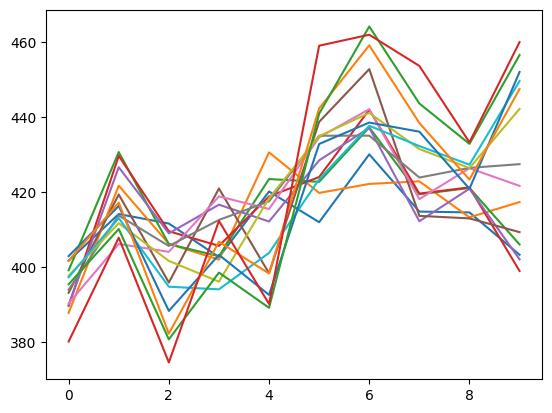

In [65]:
trayectorias_de_precios = np.zeros((10, 14))

for i in range(10):
    prediccion = simular_precios(mean_rt, std_rt, closes, 14)
    trayectorias_de_precios[i,:] = prediccion
    
plt.plot(trayectorias_de_precios)
plt.show()